---
<div align = "center">

# Lunar Lander
</div>

---

---
<div align="center">

## Project Overview
</div>

---

This project explores the impact of customizing an ``OpenAI Gym Environment`` on **reinforcement learning (RL) performance**. We modified an existing Gym environment - Lunar Lander - in order to train an RL agent using the Stable Baselines library, and later compare results between the **customized and original environments**.

The process involves:

- **Environment Customization**: **Implement changes** such as altered rewards or added challenges to the Environment.
- **Agent Training**: Train an RL agent with **algorithms like PPO** and further **tune their hyperparameters** to ensure optimal performance.
- **Evaluation**: **Compare agent performance** in both environments to analyze the effect of the customizations.

This project aims to analyse **how does the environment design influence the outcomes of a Reinforcement Learning Algorithm**.

---
## Dependencies
---

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import gymnasium as gym
import numpy as np
import math

from stable_baselines3 import (PPO)
from stable_baselines3.common.env_util import (make_vec_env)
from stable_baselines3.common.vec_env import (SubprocVecEnv)
from stable_baselines3.common.callbacks import (CheckpointCallback, EveryNTimesteps)

from Configuration import (CONFIG, PATHS_CONFIG,
                            PPO_SETTINGS_1, DQN_SETTING_1)
from Environment import (MyLunarLander)
from LunarLanderManager import (LunarLanderManager)

---
## Original Environment
---

Initially let's create the Original Lunar Lander Environment and define a Reinforcement Learning Model to be trained.

In [13]:
# Define the name of the Original Environment
originalEnv = 'LunarLander'

---
### PPO (Setting 1)
---

In [14]:
# Create a instance of the Lunar Lander Manager
ppoSetup1 = LunarLanderManager(environmentName=originalEnv, algorithm='PPO', settingsNumber=1, algorithmSettings=PPO_SETTINGS_1)

In [15]:
# Check if the Environment is working
ppoSetup1.testRandomAction()

In [49]:
# Train the Model
model = ppoSetup1.train()

Already Trained the Model over the established TimeSteps (Defined inside the CONFIG Dictionary).


In [50]:
# Test the Model over 1 Episode 
# ppoSetup1.test(model=model, numEpisodes=1)
ppoSetup1.test(model=model, numEpisodes=1)

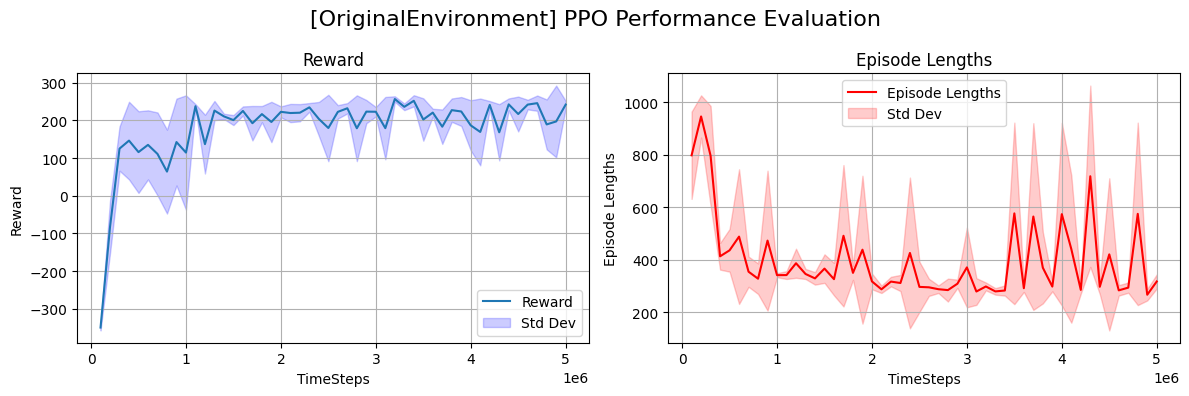

In [53]:
# Evaluate Results
ppoSetup1.checkResults()

---
### DQN (Setting 1)
---

In [ ]:
# Create a instance of the Lunar Lander Manager
dqnSetup1 = LunarLanderManager(environmentName=originalEnv, algorithm='DQN', settingsNumber=1, algorithmSettings=DQN_SETTING_1)

In [ ]:
# Check if the Environment is working
dqnSetup1.testRandomAction()

In [ ]:
# Train the Model
model = dqnSetup1.train()

In [ ]:
# Test the Model over 1 Episode 
dqnSetup1.test(model=model, numEpisodes=1)

---
## Custom Environment
---

In [4]:
# Register the Custom Environment
gym.register(
    id="MyLunarLander",
    entry_point=MyLunarLander,
)

# Define the custom environment
customEnv = 'MyLunarLander'

---
### PPO (Setting 1)
---

In [5]:
# Create a instance of the Lunar Lander Manager
ppoSetup1 = LunarLanderManager(environmentName=customEnv, algorithm='PPO', settingsNumber=1, algorithmSettings=PPO_SETTINGS_1)

In [ ]:
# Check if the Environment is working
ppoSetup1.testRandomAction()

In [6]:
# Train the Model
model = ppoSetup1.train()

Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 84.3     |
|    ep_rew_mean     | -160     |
| time/              |          |
|    fps             | 425      |
|    iterations      | 1        |
|    time_elapsed    | 19       |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 96.2        |
|    ep_rew_mean          | -146        |
| time/                   |             |
|    fps                  | 355         |
|    iterations           | 2           |
|    time_elapsed         | 46          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.009225588 |
|    clip_fraction        | 0.0573      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | 0.00154     |
|    learning

In [13]:
# Test the Model over 1 Episode 
ppoSetup1.test(model=model, numEpisodes=1)

---
### DQN (Setting 1)
---

In [ ]:
# Create a instance of the Lunar Lander Manager
dqnSetup1 = LunarLanderManager(environmentName=customEnv, algorithm='DQN', settingsNumber=1, algorithmSettings=DQN_SETTING_1)

In [ ]:
# Check if the Environment is working
dqnSetup1.testRandomAction()

In [ ]:
# Train the Model
model = dqnSetup1.train()

In [ ]:
# Test the Model over 1 Episode 
dqnSetup1.test(model=model, numEpisodes=1)

---
### REMENDOS
---

In [ ]:
# Evaluating the DQN Model after Trainning
mean_reward, std_reward = evaluate_policy(model_DQN, env, n_eval_episodes=5, render=True)
print("-> DQN")
print("Mean Reward: {}\nStandard Deviation: {}".format(mean_reward, std_reward))
env.close()

In [ ]:
# Saving Trained Models
model_DQN.save("./Models/DQN_Lunar")
model_ACER.save("./Models/ACER_Lunar")

In [ ]:
# Deleting the Models so that we can later load them
del model_DQN
del model_ACER

In [ ]:
# Loading the Previouly Saved Models
model_DQN = DQN.load("./Models/DQN_Lunar.zip")
model_ACER = ACER.load("./Models/ACER_Lunar.zip")